In [2]:
from qiskit import *
from qiskit.circuit.library import DraperQFTAdder, RGQFTMultiplier
from qiskit.quantum_info import Statevector, partial_trace
from qiskit import Aer
from qiskit.visualization import plot_histogram
# from qiskit_ibm_provider import IBMProvider
# from qiskit.tools.monitor import job_monitor

import matplotlib.pyplot as plt

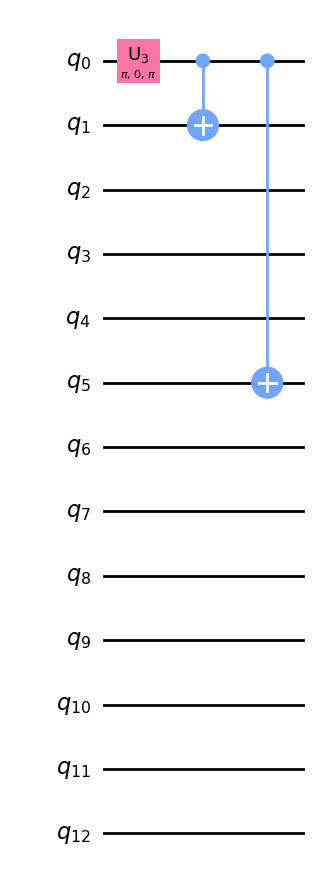

In [3]:
# implement inCircumcircle gate

num_bits_coord = 2 # num of bits to represent any number

inCC = QuantumCircuit(4*num_bits_coord + 1, name='in CC')
inCC.h([6, 2, 3, 4])
inCC.x([0, 1, 5])

inCC.cx(1, 4*num_bits_coord) # final operation to store the control qubit

inCC_gate = inCC.to_gate()

# implement add triangle gate
# copy three given numbers from the respective qubits to designated triangle location
# assumtption: num of qubits to store any index is 2


def get_addTri_gate(index1, index2, index3):

    num_bits_index = 2 # num of bits to represent any index of point

    triangle = QuantumRegister(num_bits_index * 3)

    add_Tri = QuantumCircuit(triangle, name='add Tri')
    count = 0
    for i_count, i in enumerate([index1, index2, index3]):
        for j_count, j in enumerate(bin(i)[2:]):
            if (j == '1'):
                add_Tri.x(triangle[i_count*num_bits_index + j_count])
            
    addTri_Gate = add_Tri.to_gate().control(1)   
    
    return addTri_Gate
    
gate = get_addTri_gate(1, 0, 1)

QC_test = QuantumCircuit(13)
QC_test.x(0)
QC_test.append(gate, [0] + list(range(1, 7)))


QC_test.decompose().draw('mpl')

In [4]:
len(pts)

NameError: name 'pts' is not defined

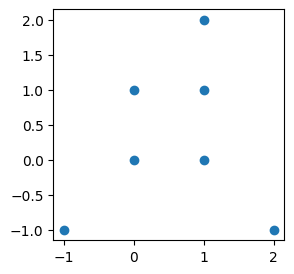

In [5]:
x = [0, 0, 1, 1, -1, 2, 1]
y = [0, 1, 0, 1, -1, -1, 2]

fig, ax = plt.subplots(figsize=(3,3))
ax.set_aspect('equal')
ax.scatter(x, y)

In [61]:
num_points = 3 # add extra 3 for super triangle
num_triangles = (2*num_points)+1
num_ancilla = 1 # optimistism
pt_size = 2 # num of qubits to represent each number alone
tri_size = 2 # num of qubits to represent each index in triangle
num_dims = 2 # x,y or x,y,z

pts = QuantumRegister(pt_size*num_dims*(num_points + 3), name='pts')
tri = QuantumRegister(3*num_triangles*tri_size, name='tri')
anc = QuantumRegister(num_ancilla, name='anc')

tri_m = ClassicalRegister(3*tri_size)

test = QuantumCircuit(anc, pts, tri, tri_m)

# assign values to qubits for coordinates
# for i in range(num_points):
#     test.x(pts[(2*i)+1])
test.x([pts[7]])
test.x([pts[9]])
test.x([pts[11]])

    
# assign dummy values for super triangle
for i in range(num_points, num_points + 3):
    test.x(pts[(2*i)+1])

# add super triangle
superTri = get_addTri_gate(1, 0, 1)
test.append(superTri, [anc[0]] + [tri[i] for i in list(range(0, 6))] )

test.barrier()

# start main loop
for i in range(len(pts)):
    for j in range(0, int(len(tri)), 6):
        test.measure(tri[list(range(j, j+6))], range(6))
        a = [0]*6

        for k, cbit in enumerate(tri_m):
            with test.if_test((cbit, 1)) as else_: # if cbit[0] is 1
                a[k] = 1
            with else_:
                a[k] = 0
        index_a = (a[0]*2) + (a[1])
        index_b = (a[2]*2) + (a[3])
        index_c = (a[4]*2) + (a[5])
    
        # dummy values inserted -- no other choice
        coords = pts[list(range(8))]
        coords.insert(0, anc[0])
        test.append(inCC_gate, coords)
        
        test.append(superTri, [anc[0]] + [tri[l] for l in list(range(0, 6))] )
        

test.draw()

░ ┌────────┐                           »
   anc: ──────────■────────────░─┤0       ├────────────────────■──────»
                  │            ░ │        │                    │      »
 pts_0: ──────────┼────────────░─┤1       ├────────────────────┼──────»
                  │            ░ │        │                    │      »
 pts_1: ──────────┼────────────░─┤2       ├────────────────────┼──────»
                  │            ░ │        │                    │      »
 pts_2: ──────────┼────────────░─┤3       ├────────────────────┼──────»
                  │            ░ │        │                    │      »
 pts_3: ──────────┼────────────░─┤4 in CC ├────────────────────┼──────»
                  │            ░ │        │                    │      »
 pts_4: ──────────┼────────────░─┤5       ├────────────────────┼──────»
                  │            ░ │        │                    │      »
 pts_5: ──────────┼────────────░─┤6       ├────────────────────┼──────»
                  │            ░ │        │                    │      »
 pts_6: ──────────┼────────────░─┤7       ├────────────────────┼──────»
        ┌───┐     │      ┌───┐ ░ │        │                    │      »
 pts_7: ┤ X ├─────┼──────┤ X ├─░─┤8       ├────────────────────┼──────»
        └───┘     │      └───┘ ░ └────────┘                    │      »
 pts_8: ──────────┼────────────░───────────────────────────────┼──────»
        ┌───┐     │      ┌───┐ ░                               │      »
 pts_9: ┤ X ├─────┼──────┤ X ├─░───────────────────────────────┼──────»
        └───┘     │      └───┘ ░                               │      »
pts_10: ──────────┼────────────░───────────────────────────────┼──────»
        ┌───┐     │      ┌───┐ ░                               │      »
pts_11: ┤ X ├─────┼──────┤ X ├─░───────────────────────────────┼──────»
        └───┘     │      └───┘ ░                               │      »
pts_12: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_13: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_14: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_15: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_16: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_17: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_18: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_19: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_20: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_21: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_22: ──────────┼────────────░───────────────────────────────┼──────»
                  │            ░                               │      »
pts_23: ──────────┼────────────░───────────────────────────────┼──────»
             ┌────┴─────┐      ░    ┌─┐                   ┌────┴─────┐»
 tri_0: ─────┤0         ├──────░────┤M├───────────────────┤0         ├»
             │          │      ░    └╥┘    ┌─┐            │          │»
 tri_1: ─────┤1         ├──────░─────╫─────┤M├────────────┤1         ├»
             │          │      ░     ║     └╥┘┌─┐         │          │»
 tri_2: ─────┤2         ├──────░─────╫──────╫─┤M├─────────┤2         ├»

In [42]:
int('01', 2)

1

In [52]:

lis

None
